In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Notebook is working")


Notebook is working


# **Introduction**
The purpose of this project is for me to practice using python as an analysis tool. 

## Data Inspection
***Disclaimer**: The data used in this project may not be entirely accurate.*

##### About the data:
- There's not credited source of this dataset.
- Data is up to 2021.

We'll first inspect the raw data that we have obtained. By using `os` module, we'll be able to interact with underlying operating system, such as viewing and accessing directories.

In [2]:
import os
# Ensure working directory is the project root (Netflix_Movies)
PROJECT_ROOT = os.path.abspath("Netflix_Movies")

# If we're already inside Netflix_Movies, this is harmless
if not os.getcwd().endswith("Netflix_Movies"):
    os.chdir(PROJECT_ROOT)

os.getcwd()

'd:\\2. Areas\\Career_Exploration\\Data_Analyst\\Python\\Kaggle_Notebooks\\Netflix_Movies'

We have found the data. Let's read the file and asign its content into the variable `df`.

In [3]:
df = pd.read_csv("Data/netflix_titles.csv.zip")

Let's first check what the data looks like using.

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Using `df.head()`, we can see what the data is like. It seems that there are only two types of data here, either each row represents a Movie or a TV Show. Some values seem to be missing, indicated by the "NaN"s. 

In [5]:
df.shape

(8807, 12)

Using `df.shape` we can see the dimension of the file. These numbers tell us that the data has 12 rows with 8,807 obvervations.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Using `df.info()` we can see the summary of each column, like their:
- total row numbers
- total column numbers
- data type
- number of missing values

The dataset contains 12 columns and 8,807 observations (rows).
Most columns are stored as `object` types, with `release_year` being the only numeric column (`int64`).

Some columns contain missing values, including `director`, `cast`, `country`, `date_added`, `rating`, and `duration`. These columns will need to be treated before further processing.

---

# **Identifying Areas of Analysis**
Since this project serves as practice for data analysis, we will be exploring some possible analysis that can be driven out of the data set. Below is a list of things we can analyze based on what we have:

##### Movies vs TV Shows
The differences between the amount of movies versus tv shows being included in Netflix could possibly tell us what kind of show Netflix has chosen to include. Either they prefer movies more or tv shows more.

##### Rating Types
The amount of shows that each type of rating has could tell us the kinds of shows Netflix tend to include. For example, highest show rating could be TV-MA, which means that Netflix tend to distribute more Mature-themed tv shows than others.

##### Popular Directors
The amount of directors could tell us which director's works has been the most included in Netflix's listings. Further analysis could be done to identify specific reasons why these directors are included more often than others.

##### Date Added
With this we could possibly see Netflix's patterns of adding shows into their listings. Could be seasonal updates or cyclical or totally random.

---

# **Analyzing Data**
In this section, we'll be doing the data processing and analysis for each area.

## Movies vs TV Shows
>*How is Netflix's catalog split between Movies and TV Shows?*

For this analysis, all we need to do is a simple aggregation method for the `type` column.

### Data Processing

Below is the code used:

In [ ]:
type_counts = df["type"].value_counts()
# Get grouped counts of show type
# Assign to a variable for future use

# See result:
type_counts

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

**Explanation of `df["type"].value_counts()`**

- `df["type"]` - selects one column from the data frame.
- it groups identical values.
- counts how many time each appears.
- automatically sorts results from **most** frequent to **least** frequent.

### Plot
Since the `type` column contains *categorical* data, we will be using a **bar chart**. 

<Axes: title={'center': 'Distribution of Netflix Content by Type as of 2021'}, xlabel='Content Type', ylabel='Number of titles'>

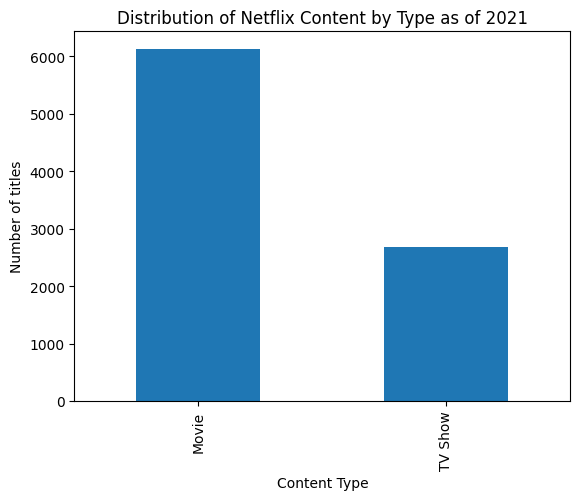

In [12]:
# Bar chart plot
type_counts.plot(
    kind="bar",
    title="Distribution of Netflix Content by Type as of 2021",
    ylabel="Number of titles",
    xlabel="Content Type"
)

### Analysis
By counting the number of titles by content type, we can see that, as of 2021, Netflix's catalog significantly contains more Movies than of TV Shows. There's no other value other than `Movie` or `TV Show`, which means that the values are clean. This result simply shows the content of Netflix's catalog, not necessarily subscribers' preferences.

## Rating Types
>*(Question to ask)*

### Data Processing

### Plot

### Analysis

## Popular Directors
>*(Question to ask)*

### Data Processing

### Plot

### Analysis

## Date Added
>*(Question to ask)*

### Data Processing

### Plot

### Analysis